# Practice Project - 6

# Advertising Sales Channel Prediction

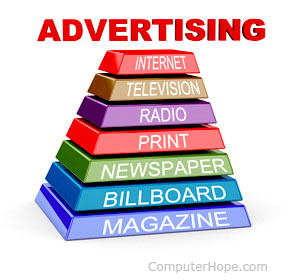

<b>Problem Statement:</b>

<b>Sales Channel Prediction Case Study</b>

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


<b>The target variable, i.e., "Sales" contains continuous data. Hence, it is a Regression problem.</b>

<b> The column "Unnamed:0" has no relation with the target variable. So, let's just drop it.</b>

In [3]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [8]:
df.sample(3)

,TV,radio,newspaper,sales
174,222.4,3.4,13.1,11.5
119,19.4,16.0,22.3,6.6
191,75.5,10.8,6.0,9.9


In [9]:
df.shape

(200, 4)

<b>Our dataset consists of 200 rows and 4 columns.</b>

In [10]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

<b>Our dataset consists of the columns 'TV', 'radio', 'newspaper' and 'sales'.</b>

In [11]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [14]:
# Let's check the uniqueness of the target variable

df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [15]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

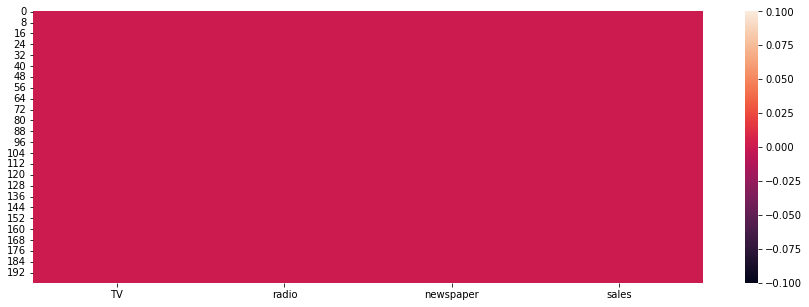

In [16]:
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull())

<b> There are no null values in the dataset.</b>

# Descriptive Statistics

In [17]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<b> The count of all the columns is same. Thus, we can say that the data is balanced.</b>

# Visualization of the Data

<b>Let's use distplot to visualize the frequency of the number of classes in all the columns.</b>

<AxesSubplot:xlabel='TV', ylabel='Density'>

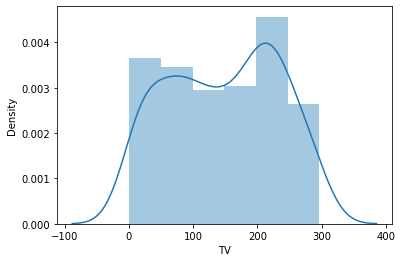

In [18]:
sns.distplot(df['TV'])

<b> From the graph for "TV", we can conclude that the data is normally distributed.</b>

<AxesSubplot:xlabel='radio', ylabel='Density'>

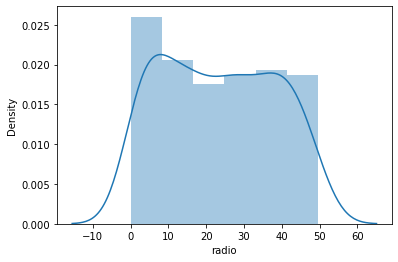

In [19]:
sns.distplot(df['radio'])

<b>From the graph for "radio", we can conclude that the data is normally distributed.</b>

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

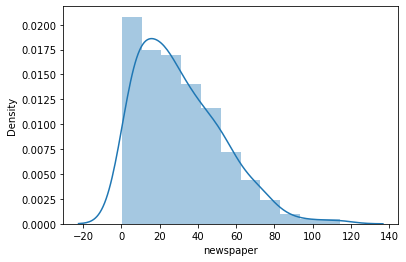

In [20]:
sns.distplot(df['newspaper'])

<b>From the graph for "newspaper", we can conclude that the data is skewed left.</b>

<AxesSubplot:xlabel='sales', ylabel='Density'>

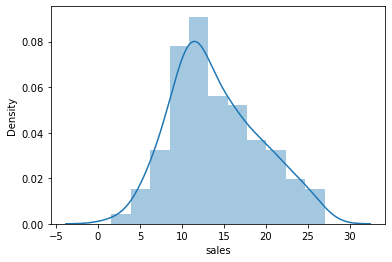

In [21]:
sns.distplot(df['sales'])

<b>From the graph for "radio", we can conclude that the data is normally distributed.</b>

<AxesSubplot:xlabel='TV', ylabel='sales'>

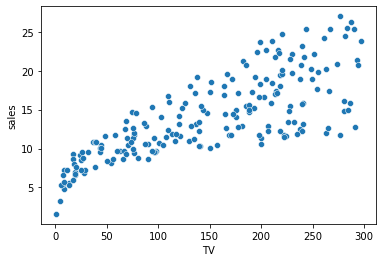

In [22]:
sns.scatterplot(x ='TV', y='sales', data=df)

<b> This graph shows an upward trending position. This means, sales increase with an increase in investment on TV.</b>

<AxesSubplot:xlabel='radio', ylabel='sales'>

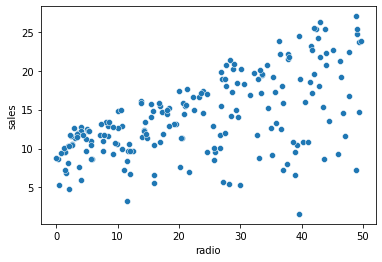

In [23]:
sns.scatterplot(x ='radio', y='sales', data=df)

<b>This graph shows an upward trending position. This means, sales increase with an increase in investment on TV. But, there are some outliers present in the data.</b>

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

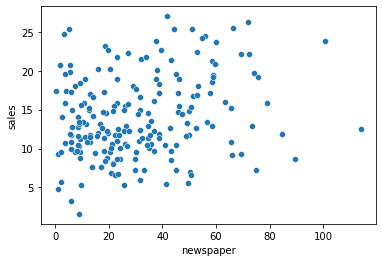

In [24]:
sns.scatterplot(x ='newspaper', y='sales', data=df)

<b> The data is scattered, and shows no trend.</b>

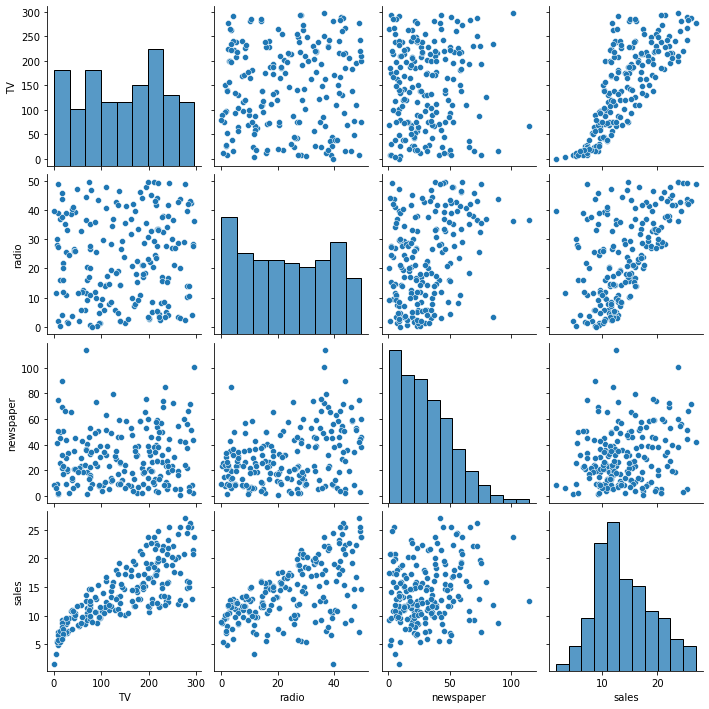

In [25]:
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

# Correlation

In [26]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

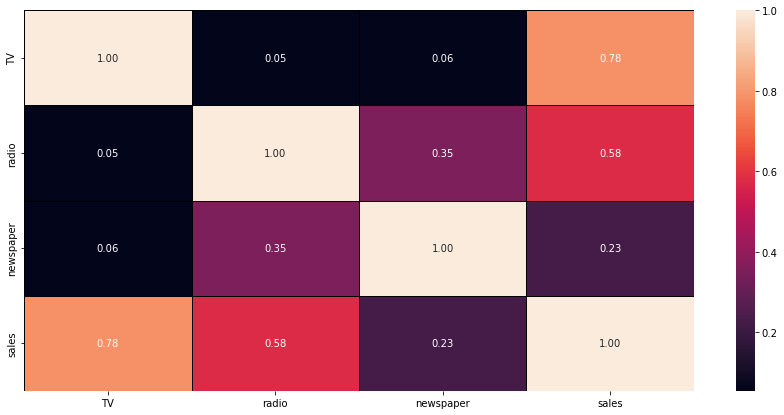

In [27]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, linecolor="black", fmt = '.2f')

<b>All the columns are positively correlated with the target variable.</b>        

<b>The column 'Tv' has 78% correlation with the target column.        
The column 'radio' has 58% correlation with the target column.          
The column 'sales' has 23% correlation with the target column.</b>
    
<b>Max. correlation: TV</b>

# Outlier Detection

<AxesSubplot:xlabel='TV'>

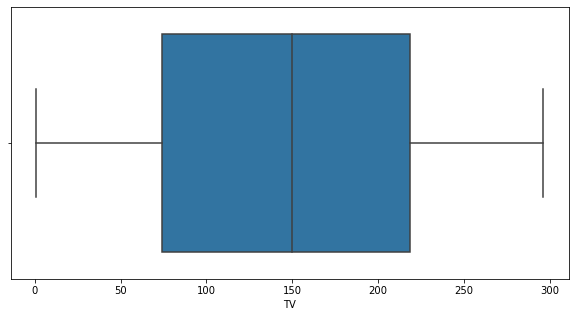

In [28]:
plt.figure(figsize = (10,5))

sns.boxplot(df['TV'])

<b>As we can see, outliers are not present in the column "TV".</b>

<AxesSubplot:xlabel='radio'>

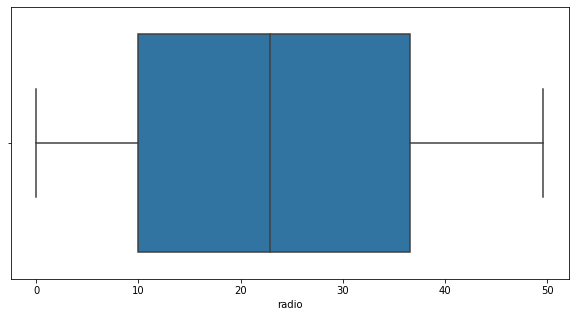

In [29]:
plt.figure(figsize = (10,5))

sns.boxplot(df['radio'])

<b>As we can see, outliers are not present in the column "radio".</b>

<AxesSubplot:xlabel='newspaper'>

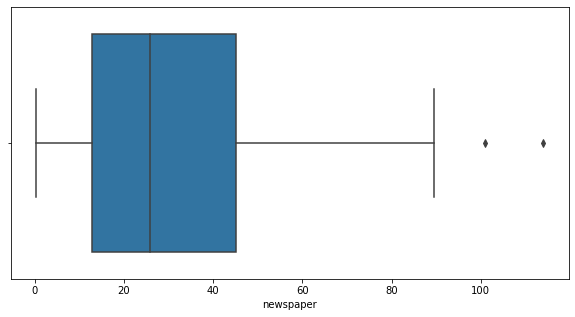

In [30]:
plt.figure(figsize = (10,5))

sns.boxplot(df['newspaper'])

<b>As we can see, outliers are present in the column "newspaper".</b>

<AxesSubplot:xlabel='sales'>

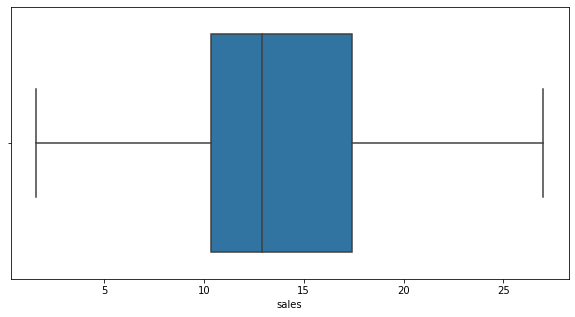

In [31]:
plt.figure(figsize = (10,5))

sns.boxplot(df['sales'])

<b> As we can see, outliers are not present in the column "sales".</b>

In [32]:
# Removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(200, 4)
(198, 4)


In [33]:
print("Old DataFrame", df.shape)
print("New DataFrame", df_new.shape)
print("total_dropped_rows", df.shape[0] - df_new.shape[0])

Old DataFrame (200, 4)
New DataFrame (198, 4)
total_dropped_rows 2


# Percentage data loss

In [34]:
loss_percent = (200-198)/200*100
print(loss_percent, '%')

1.0 %


<b>Since, the data loss is only 1%, we can proceed further.</b>

In [35]:
df = df_new

df.shape

(198, 4)

In [36]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [37]:
# Now, let's Check for Skewness

df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [38]:
df.skew().sort_values()

TV          -0.082332
radio        0.114842
sales        0.407130
newspaper    0.650112
dtype: float64

In [39]:
#separating the dependent and independent variables

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [40]:
from sklearn.preprocessing import power_transform

x_new = power_transform(x)

x = pd.DataFrame(x_new, columns=x.columns)

x.skew()

TV          -0.320682
radio       -0.236668
newspaper   -0.101288
dtype: float64

In [41]:
x.shape

(198, 3)

In [42]:
y.shape

(198,)

# Scaling the Data by using StandardScaler

In [43]:
from sklearn.preprocessing import StandardScaler

SC = StandardScaler()
x_scaled = SC.fit_transform(x)
x_scaled

array([[ 0.95598306,  0.9691098 ,  1.6041965 ],
       [-1.19200349,  1.04623436,  0.83104401],
       [-1.6461253 ,  1.37296802,  1.60705249],
       [ 0.14293428,  1.1473316 ,  1.28376774],
       [ 0.45645241, -0.73502642,  1.28062154],
       [-1.8204008 ,  1.51543955,  1.76610727],
       [-1.00349358,  0.70309642, -0.10205346],
       [-0.20996049, -0.0876566 , -0.84968895],
       [-1.82264543, -1.62948287, -2.09866461],
       [ 0.652694  , -1.56152179, -0.22649933],
       [-0.88482761, -1.19258569, -0.06553382],
       [ 0.80322028,  0.19357553, -1.59608414],
       [-1.52567125,  0.82725998,  1.50859232],
       [-0.48090308, -1.01613619, -1.23269654],
       [ 0.69642374,  0.70856268,  0.86367455],
       [ 0.60769456,  1.45886692,  1.1026083 ],
       [ 1.44702338,  1.06152278,  1.19771741],
       [-0.84304109, -0.02834315, -0.39458775],
       [ 0.09676151,  0.18741189, -0.346834  ],
       [ 0.84017479,  0.41523303,  1.11921444],
       [ 1.02746612, -1.2660875 , -0.102

In [44]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [45]:
lr = LinearRegression()
ridgecv = RidgeCV()
lassocv = LassoCV()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()

In [46]:
model = [lr, ridgecv, lassocv, rfr, dtr, svr]

maxAccu = 0
bestRS = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.9422101199050925 on random state 449


# Linear Regression

In [47]:
lr = LinearRegression() 

lr.fit(x_train, y_train) 
pred = lr.predict(x_test)

print('R2 Score', r2_score(y_test, pred))

R2 Score 0.8815178164055308


In [48]:
print('MAE:',metrics.mean_absolute_error(y_test, pred))
print('MSE:',metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 1.3942575504503767
MSE: 3.7167979475768558
RMSE: 1.9278998800707612


# Ridge Regression

In [49]:
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize=True)

ridgecv.fit(x_train,y_train)

ridgecv.alpha_

ridge_model = Ridge(alpha=ridgecv.alpha_)

ridge_model.fit(x_train, y_train)

ridge_model.score(x_test, y_test)

0.8815169387081733

# Lasso Regression

In [50]:
lassocv = LassoCV(alphas=None, max_iter=1000, normalize=True)

lassocv.fit(x_train, y_train)

alpha = lassocv.alpha_

lasso_reg = Lasso(alpha)

lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_test, y_test)

0.881469670902627

# Random Forest Regressor

In [51]:
rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)

predrf = rfr.predict(x_test)

print('R2 Score:', metrics.r2_score(y_test, predrf))

R2 Score: 0.9753123855730989


In [52]:
print(metrics.mean_absolute_error(y_test, predrf))
print(metrics.mean_squared_error(y_test, predrf))
print(np.sqrt(metrics.mean_squared_error(y_test, predrf)))

0.6438333333333315
0.7744529333333304
0.8800300752436422


# Decision Tree Regressor

In [53]:
dtr = DecisionTreeRegressor()

dtr.fit(x_train, y_train)

pred_dtr = dtr.predict(x_test)

print('R2 Score:', metrics.r2_score(y_test, pred_dtr))

R2 Score: 0.9439700011582154


In [54]:
print(metrics.mean_absolute_error(y_test, pred_dtr))
print(metrics.mean_absolute_error(y_test, pred_dtr))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_dtr)))

0.9866666666666668
0.9866666666666668
1.3257702163899543


# Support Vector Regressor

In [55]:
svr = SVR()

svr.fit(x_train, y_train)

pred_svr = svr.predict(x_test)

print('R2 Score:',metrics.r2_score(y_test, pred_svr))

R2 Score: 0.8467086530253196


In [56]:
print(metrics.mean_absolute_error(y_test, pred_svr))
print(metrics.mean_squared_error(y_test, pred_svr))
print(metrics.mean_squared_error(y_test, pred_svr))

1.3411504173171465
4.808764883730422
4.808764883730422


# Cross Validation

In [58]:
print('Linear Regression:',cross_val_score(lr, x_scaled, y, cv=5).mean())

print('Ridge Regression:',cross_val_score(ridge_model, x_scaled, y, cv=5).mean())
      
print('Lasso Regression:',cross_val_score(lasso_reg, x_scaled,y, cv=5).mean())

print('Random Forest Regressor:',cross_val_score(rfr, x_scaled, y, cv=5).mean())

print('Decission Tree Regressor:',cross_val_score(dtr, x_scaled, y, cv=5).mean())

print('Support Vector Regressor:',cross_val_score(svr, x_scaled, y, cv=5).mean())

Linear Regression: 0.8958270968555071
Ridge Regression: 0.8958272248970255
Lasso Regression: 0.8959757978398848
Random Forest Regressor: 0.975890801613257
Decission Tree Regressor: 0.9458239563616223
Support Vector Regressor: 0.9202978192122426


<b> We can see that the best model is "Random Forest Regressor".</b>

# Hyper Parameter Tuning

In [59]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [60]:
GCV = GridSearchCV(RandomForestRegressor(), parameters, cv=5)

In [61]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [62]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [63]:
Adsales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)

Adsales.fit(x_train, y_train)
pred = Adsales.predict(x_test)

print("RMSE value:", np.sqrt(metrics.mean_squared_error(y_test, predrf)))
print('R2_Score:', r2_score(y_test, pred)*100)

RMSE value: 0.8800300752436422
R2_Score: 97.28699494436313


# Saving the best model

In [64]:
import joblib
joblib.dump(Adsales,"AdSales_Channel.pkl")

['AdSales_Channel.pkl']